## Dehli Indian Housing Part 2 Predicting Price with Size using Linear Regression by Dumisani Maxwell Mukuchura

#### Dataset Source: *https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price*

##### Contact: dumisanimukuchura@gmail.com | LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/

##### This Project will explore the Dehli Indian Housing and build a model predicting rental price from size. 

##### As seen from Part one Rental Price has a positive correlation of approx. 0.57 with House Size

## 1. Prepare Data

### Molule, Library and Data Imports

In [18]:
#Import Standard Modules and Libraries to use

import os #For file and directory operations

#Data Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt

#Model Related Libraries: Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

### Defining file path and import 'Dehli-Indian-Housing-Clean-Data.csv' from EDA Project

In [19]:
#Defining file path and import 'Dehli-Indian-Housing-Clean-Data.csv'
# Get the current working directory
current_dir = os.getcwd()

# Trim to one level above
base_dir = os.path.dirname(current_dir)

# Construct the path to the data folder
data_dir = os.path.join(base_dir, "data")

# Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "Dehli-Indian-Housing-Clean-Data.csv")

In [45]:
# Wrangle function to automate the Data Importing and any Additional Cleaning

def wrangle(csv_file_path):

    # Read the CSV file into a DataFrame
    housing_data = pd.read_csv(csv_file_path)

    #Make a Copy and Maintain the original dataset as is 
    housing_df = housing_data.copy()

    #Subset with "house_size_in_sqft" between 0.25 and 0.75 quartiles
    low, high = housing_df["house_size_in_sqft"].quantile([0.25, 0.75])
    mask_area = housing_df["house_size_in_sqft"].between(low, high)

    housing_df = housing_df[mask_area]

    return housing_df

In [27]:
#Using Wrangle funtion to create the housing_df DataFrame

housing_df = wrangle(csv_file_path)

#Check if the import was successful with a shape check
print("df shape:", housing_df.shape)

#Check if the import was successful with a head() check
housing_df.head()

df shape: (1177, 19)


,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
2,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
5,Independent Floor,Saket,Delhi,28.523548,77.200142,235595,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Its three bhk builder floor in the super locat...,"7,54,225",Unfurnished,3,BHK,2856.0,2747.14
7,Independent Floor,Saket,Delhi,28.523548,77.200142,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,11,001",Unfurnished,3,BHK,2856.0,3509.93
8,Independent Floor,Saket,Delhi,28.523548,77.200142,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Its three bhk builder floor in the super locat...,"10,10,202",Unfurnished,3,BHK,2856.0,3509.93
11,Independent Floor,Maharani Bagh,Delhi,28.572620,77.264221,401015,INR,4.0,2.0,Not Negotiable,0.79,Posted a year ago,Its four bhk builder floor in the super locati...,"12,02,002",Unfurnished,4,BHK,5896.0,4676.01


In [28]:
# Checking DataFrame Details

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 2 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          1177 non-null   object 
 1   location            1177 non-null   object 
 2   city                1177 non-null   object 
 3   latitude            1177 non-null   float64
 4   longitude           1177 non-null   float64
 5   price               1177 non-null   int64  
 6   currency            1177 non-null   object 
 7   numBathrooms        1177 non-null   float64
 8   numBalconies        1177 non-null   float64
 9   isNegotiable        1177 non-null   object 
 10  priceSqFt           1177 non-null   float64
 11  verificationDate    1177 non-null   object 
 12  description         1177 non-null   object 
 13  SecurityDeposit     1177 non-null   object 
 14  Status              1177 non-null   object 
 15  numBedroom          1177 non-null   int64  
 16  house_layou

## 2. Explore

###  Further Analysis into the Two key Columns we shall need "house_size_in_sqft" and "price_approx_usd".

- We saw in the previous project that property size is an important factor in determining price. With that in mind, let's look at the distribution of property sizes in our dataset.

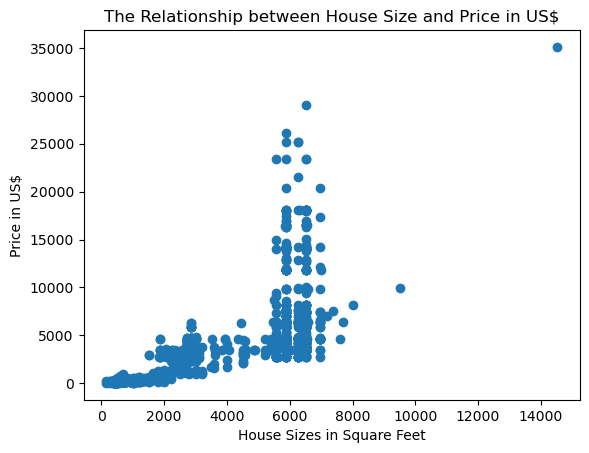

In [11]:
# Scatter Plot of "house_size_in_sqft" and "price_approx_usd".

plt.scatter (x=housing_df["house_size_in_sqft"], y=housing_df["price_approx_usd"])
plt.xlabel("House Sizes in Square Feet")
plt.ylabel("Price in US$")
plt.title("The Relationship between House Size and Price in US$")

plt.show();

- From the relationship, we can notice a positive correlation, but we also have Outliers that need to be explored.

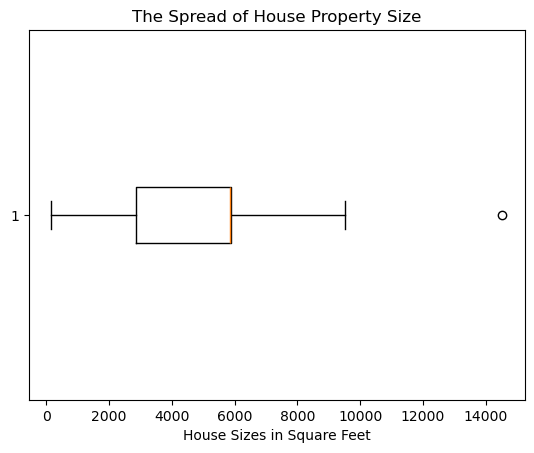

In [23]:
# Box Plot of the Relationsing between Property Size and Property Price: "house_size_in_sqft" and "price_approx_usd".

plt.boxplot(housing_df["house_size_in_sqft"], vert=False)
plt.xlabel("House Sizes in Square Feet")
plt.title("The Spread of House Property Size")

plt.show();

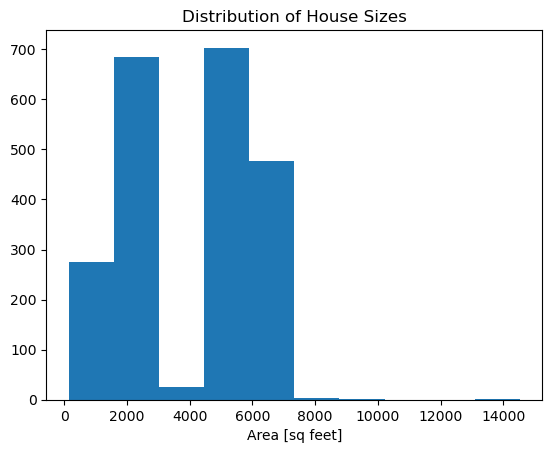

In [13]:
# Histogram to understand the spread of House Sizes

plt.hist(housing_df["house_size_in_sqft"])
plt.xlabel("Area [sq feet]")
plt.title("Distribution of House Sizes")

plt.show();

In [10]:
# Get Statistical Description of the "house_size_in_sqft"

housing_df["house_size_in_sqft"].describe()

count     2171.000000
mean      4347.608936
std       2063.935942
min        150.000000
25%       2856.000000
50%       5852.000000
75%       5896.000000
max      14521.000000
Name: house_size_in_sqft, dtype: float64

- The statistics above confirm what we suspected. While most of the properties in our dataset are between 2856 sqm and 5896 sqm we have others as lower as 150 sqm and others as big 14521 sqm and he best way is to identify those outliers and remove them. We can do this by utilizing the Inter Quartile Range and updating our Wrangle Function and removing them.

## 3. Split

A key part in any model-building project is separating your **target** (the thing you want to predict) from your **features** (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: House Size: house_size_in_sqft.

In [36]:
#Splitting Data Set to have Training Data and Testing Data

# Randomly select 100 rows for the test set with a fixed random state considering our DataFrame has finally 1177 Rows
housing_test_df = housing_df.sample(n=100, random_state=42)

# Remove the selected rows from the original DataFrame to create the training set
housing_training_df = housing_df.drop(housing_test_df.index)

# Define the file names for the CSV files 
test_file = "housing_test_data.csv" 
training_file = "housing_training_data.csv" 

# Construct the full paths to the new CSV files 
csv_file_path1 = os.path.join(data_dir, test_file) 
csv_file_path2 = os.path.join(data_dir, training_file) 

# Export the test set to a CSV file
housing_test_df.to_csv(csv_file_path1, index=False)

# Optionally, you can also export the training set to a CSV file
housing_training_df.to_csv(csv_file_path2, index=False)

In [37]:
# Subset the Feature Matrix and the Target Vector using housing_training_df

target = "price_approx_usd"
feature = ["house_size_in_sqft"]
y_train = housing_training_df[target]
X_Train = housing_training_df[feature]
print(y_train.shape)                    #To view a successful split into the Target Vectoe which should always be One-Dimensional
X_Train.head()                          #To view a successful split into the Feature Matrix which should have a minimum of Two-Dimensions

(1077,)


,house_size_in_sqft
2,5562.0
5,2856.0
7,2856.0
8,2856.0
11,5896.0


## 4. Build Model

### Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an house size which is a MEAN or AVERAGE. So let's start by figuring out what our baseline model's prediction should be. 

In [49]:
#Mean Calculation for it to be the Predicted Value

y_mean = y_train.mean()
print("y mean is $", round(y_mean,2))
y_pred_baseline = [y_mean] * len(y_train)  #Note y_mean is listed []
y_pred_baseline[:5]

y mean is $ 4733.05


[4733.04782729805,
 4733.04782729805,
 4733.04782729805,
 4733.04782729805,
 4733.04782729805]

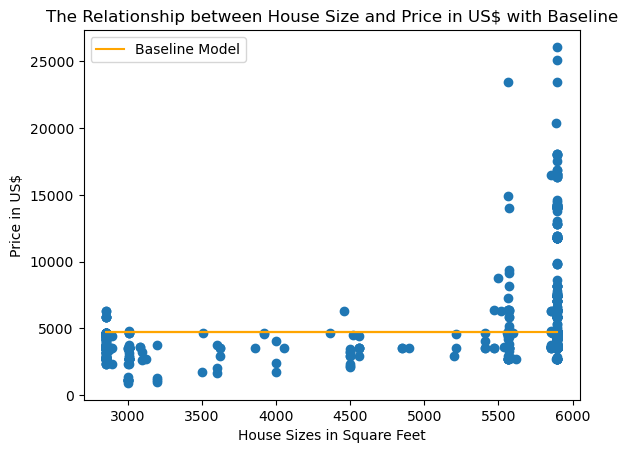

In [46]:
# Plot the Baseline against Scatter Plot with updated Cleaned Data

plt.plot(X_Train.values, y_pred_baseline, color = "orange", label = "Baseline Model")
plt.scatter (x=housing_df["house_size_in_sqft"], y=housing_df["price_approx_usd"])
plt.xlabel("House Sizes in Square Feet")
plt.ylabel("Price in US$")
plt.title("The Relationship between House Size and Price in US$ with Baseline")
plt.legend(); #To allow printing of Baseline annotations 

plt.show();

In [50]:
# Perfomance Metric for Mean Absolute Error 

baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("The Baseline Mean Absolute Error: $", round(baseline_mae, 2))

The Baseline Mean Absolute Error: $ 1651.68


- Thus for this Baseline if we predict for every House to be of the Value equal to the Mean thus, **US$4733.04782729805**.
  
- We would be off with  +/- **US$1651.6847858101657** from the Actual Value. Now we go on to create a Model that will have to be better than the baseline 

### Iterate

In [52]:
# Instantiate the Linear Regression Model

model = LinearRegression()

# Fit the Model to Training Data 
model.fit(X_Train, y_train)

LinearRegression()

In [54]:
# Check if the Model is Fitted
check_is_fitted(model)

In [55]:
#Check the model against its own Training Data, X_Train
y_pred_training = model.predict(X_Train)
y_pred_training[:5] #view the results in an array

array([5388.06589046, 3442.64109551, 3442.64109551, 3442.64109551,
       5628.18853699])

In [60]:
# Calculate the Model's Mean Absolute Error when it is Training Data 
training_mae = mean_absolute_error(y_train, y_pred_training)
print("The Mean Absolute Error of the Model when tested on its Training Data is $", training_mae.round(2))

The Mean Absolute Error of the Model when tested on its Training Data is $ 1544.43


The Model's Mean Absolute Error is $1544.43 which is less than the Baseline showing that the model performs better than the Baseline which had a Mean Absolute Error of $ 1651.68

### Testing 

In [62]:
#Check the Performance of the Model on Test Data
y_test = housing_test_df[target]
X_Test = housing_test_df[feature]
y_pred_test = model.predict(X_Test)

test_mae = mean_absolute_error(y_test, y_pred_test)
print("The Mean Absolute Error of the Model when tested on Test Data is $", test_mae.round(2))

The Mean Absolute Error of the Model when tested on Test Data is $ 1191.67


The Model's Mean Absolute Error on Test Data is also much improved than the MAE's of the Baseline and also when tested against its own Training Data. Now we move on to communicate the results and the Model as a Mathematical Equation

## 5. Communicate

We can represent our Model as a Linear Equation y = mx + c where we have to find the coefficient and also the y-intercept and generate the full equation

In [68]:
# Generating the Equation
coefficient = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)
print("Model Coefficient:", coefficient)
print("Model Intercept:", intercept)

print(f"The Model Equation: housing_price_in_usd = {coefficient} * house_size_in_sqft + {intercept}") 

Model Coefficient: 0.72
Model Intercept: 1389.38
The Model Equation: housing_price_in_usd = 0.72 * house_size_in_sqft + 1389.38


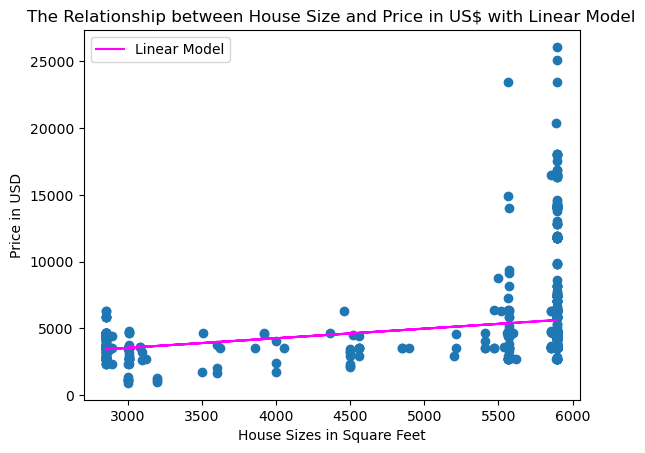

In [69]:
# Generating the plot to visualize the Linear Model 

plt.plot(X_Train.values, model.predict(X_Train), color = "magenta", label = "Linear Model")
plt.scatter(X_Train, y_train)
plt.xlabel("House Sizes in Square Feet")
plt.ylabel("Price in USD")
plt.title("The Relationship between House Size and Price in US$ with Linear Model")

plt.legend();

plt.show();

## 6: Conclusion 

With this Project the Linear Regression model was used to predict House Prices from House Size and went through the following stages:
1. Prepare Data: Import Data
2. Explore: Further Cleaning: Correlation, Outliers.
3. Split: Training Data and Test Data as well as splitting the Training Data to have Feature Matrix and the Target Vector
4. Build Model: Baseline, Iterate, Test
5. Communicate: With an Equation and also a Graphical View